<div style="background-color: #042354;padding-top: 10px;padding-bottom: 10px;padding-left: 10px;">
    <img src="https://assets.website-files.com/60b56cdf18d38e15ce088579/60b580ab8d45223dc593968d_pucp%7D.svg" style="float: left"/><br /><br />
    <h1 style="color:white">
        1MTR15 Temas de Ingeniería Mecatrónica D
    </h1>
</div>

<div style="background-color: #DDDDDD;padding-top: 10px;padding-bottom: 10px;padding-left: 10px;">
    <h2>Lab 7: [AWS] API Gateway, Lambda, DynamoDB, IAM, S3</h2>
</div>

__Lab instructor:__ Victor Giron

<div class="alert alert-block alert-success">
    <h3><b>Lab activities:</b></h3>
    <ul>
        <li><b>Part 1:</b> Link the API POST method and its Lambda function to the DynamoDB table.</li>
        <li><b>Part 2:</b> Create a custom policy in AWS IAM.</li>
        <li><b>Part 3:</b> Link the API GET method and its Lambda function to the DynamoDB table.</li>
        <li><b>Part 4:</b> Create a custom authorization.</li>
        <li><b>Part 5:</b> Host a static website in S3.</li>
    </ul>
</div>

### Components overview

<center>
        <img src="https://i.ibb.co/pJNt0hx/Compare-Yourself-Full-App-II.png" width="750" />
</center>

<div style="background-color: #f2f2f0;padding-top: 10px;padding-bottom: 10px;padding-left: 10px;">
    <h3>Part 1: Link the API POST method and its Lambda function to the DynamoDB table</h3>
</div>

<div class="alert alert-block alert-info">
    As a reminder, from now on <b>[CODE]</b> stands for your student code (e.g., 20201234).
</div>

1. Open __Lambda__ and modify the funtion __`cy-store-data-[CODE]`__ as follows:

In [ ]:
const AWS = require('aws-sdk');
const dynamodb = new AWS.DynamoDB({region:'eu-central-1',apiVersion:'2012-08-10'});

exports.handler = (event, context, callback) => {
    const params = {
        Item: {
            "Userid": {
                "S": "U" + Math.random()
            },
            "Age": {
                "N": "" + event.age
            },
            "Height": {
                "N": "" + event.height
            },
            "Income": { 
                "N": "" + event.income
            }
        },
        TableName: "compare-yourself-20201234"
    }

    dynamodb.putItem(params, function(err, data) {
        if (!err) {
            console.log(data);
            callback(null, data);
        } else {
            console.log(err);
            callback(err);
        }
    })
}

&nbsp; 2. __Deploy__ the function.<br /><br />
&nbsp; 3. Perform persistence tests with __Lambda__, __API Gateway__ and __Postman__.<br /><br />
&nbsp;&nbsp;&nbsp; 3.1 Test with the __Lambda__ console.<br /><br />
- Create a __test event__ with the following JSON format:

In [ ]:
{
    "age": "20",
    "height": "170",
    "income": "10000"
}

- Open __DynamoDB__ and check the items of the table __`compare-yourself-[CODE]`__ previously created. The values sent from the function __`cy-store-data-[CODE]`__  must be displayed.<br /><br />
3.2. Test with __API Gateway__ console.<br /><br />
- Go to __`POST > Integration Request > Mapping templates > Content-Type: application-json`__, and check for this template:

In [ ]:
{
    "age": $input.json('$.age'),
    "height": $input.json('$.height'),
    "income": $input.json('$.income')
}

- Go to __`POST method > Integration Response > Mapping templates > Content-Type: application-json`__, and check for an __empty__ template.<br /><br/>
- In __Method Execution__, choose __Test__ with the following __Request Body__:

In [ ]:
{
    "age": 30,
    "height": 180,
    "income": 20000
}

- Switch to __DynamoDB__ and check the items of the table __`compare-yourself-[CODE]`__. The values sent from the __POST__ method in __API Gateway__ must be displayed.

3.3. Test using __Postman__.<br/>
- __Deploy__ API.<br/><br/>
- Open __Postman__, create a new __collection__ and add a __HTTP POST request__.<br/><br/>
- Copy the __Invoke URL__ from `API Gateway > Stages > dev > POST` and paste it in the __Postman__ request.<br/><br/>
- In the __Body__ tab, select __raw__ and __JSON__ format and type:

In [ ]:
{
    "age": 40,
    "height": 190,
    "income": 30000
}

- Click __Send__.<br /><br />
- Check for `status 200` and switch to __DynamoDB__. Check the items of the table __`compare-yourself-[CODE]`__. The values sent from the __Postman__ must be displayed.

<div style="background-color: #f2f2f0;padding-top: 10px;padding-bottom: 10px;padding-left: 10px;">
    <h3>Part 2: Create a custom policy in AWS IAM</h3>
</div>

__Using the pre defined Role__

&nbsp; &nbsp; During the semester we will follow these steps:<br /><br />
&nbsp; 1. Open __Lambda__ and click on Configuration.<br /><br />
&nbsp; 2. Click on Permissions.<br /><br />
&nbsp; 3. On Execution role, click on Edit.<br /><br />
&nbsp; 4. Change the current role to __cy-store-data-role-jrt56dob__ and click on Save.<br /><br />
&nbsp; &nbsp; Now we can skip to __Part 3: Link the API GET method and its Lambda function to the DynamoDB table.__.<br /><br />

__Regular procedure (useful for accounts outside of the course)__

<center>
        <img src="https://docs.aws.amazon.com/es_es/IAM/latest/UserGuide/images/policies-customer-managed-policies.diagram.png" width="500" />
</center>

1. Go to AWS `IAM > Access Management > Policies > Create Policy`<br /><br />
2. Select __DynamoDB__ service.<br /><br />
3. In __Read__ access level, check __GetItem__ and __Scan__.<br /><br />
4. Select __Specific__ resource and click __Add ARN__ (Amazon Resource Name) for __index__.<br /><br />
5. Click __List ARNs manually__ and paste the ARN for __`compare-yourself-[CODE]`__ table.<br /><br />
6. Click Next: Tags.<br /><br />
7. Click Next: Review.<br /><br />
8. Name the policy as __`dynamodb-scan-cy-role-[CODE]`__.<br /><br />
9. Click __Create policy__.<br /><br />
10. Attach the __`dynamodb-scan-cy-role-[CODE]`__ policy to the Lambda execution role for the function __`cy-get-data-[CODE]`__.<br /><br />
    - Search for __`dynamodb-scan-cy-role-[CODE]`__.<br /><br />
    - Select it and click __Attach__ under the __Actions__ menu.<br /><br />
    - Search for the execution role for the function __`cy-get-data-[CODE]`__.<br /><br />
    - Select it and click __Attach policy__.

<div style="background-color: #f2f2f0;padding-top: 10px;padding-bottom: 10px;padding-left: 10px;">
    <h3>Part 3: Link the API GET method and its Lambda function to the DynamoDB table.</h3>
</div>

1. Go to Lambda and modify the function __`cy-get-data-[CODE]`__ as follows:

In [ ]:
const AWS = require('aws-sdk');
const dynamodb = new AWS.DynamoDB({region:'eu-central-1',apiVersion:'2012-08-10'});

exports.handler = (event, context, callback) => {
    const type = event.type;
    
    if (type === 'all') {
        const params = {
            TableName:'compare-yourself-20201234'
        }
        dynamodb.scan(params, function(err, data) {
            if (!err) {
                console.log(data);
                callback(null, '[OK] ' + data)
            } else {
                console.log(err);
                callback(err);
            }
        })
    } else if (type === 'single') {
        callback(null, 'single');
    } else {
        callback(null, 'other');
    }
}

&nbsp; 2. __Deploy__ the function.<br /><br />
&nbsp; 3. Create a __test event__ with the following JSON format:

In [ ]:
{
    "type": "all"
}

&nbsp; 4. Click __Test__ and review the results.

<div class="alert alert-block alert-info">
In the current state of our code, the items returned are <b>serialized</b> so we cannot see the actual values. To change this behaviour we need to <b>deserialize</b> the data returned from DynamoDB.
</div>

&nbsp; 5. Modify the function __`cy-get-data-[CODE]`__ to deserialize the data retrieved from DynamoDB:

In [ ]:
const AWS = require('aws-sdk');
const dynamodb = new AWS.DynamoDB({region:'eu-central-1',apiVersion:'2012-08-10'});

exports.handler = (event, context, callback) => {
    const type = event.type;
    
    if (type === 'all') {
        const params = {
            TableName:'compare-yourself-20201234'
        }
        dynamodb.scan(params, function(err, data) {
            if (!err) {
                console.log(data);
                
                const items = data.Items.map((dataField) => {
                    return {Age: + dataField.Age.N, 
                            Height: + dataField.Height.N, 
                            Income: + dataField.Income.N}
                    }
                )
                
                callback(null, items)
            } else {
                console.log(err);
                callback(err);
            }
        })
    } else if (type === 'single') {
        callback(null, 'single');
    } else {
        callback(null, 'other');
    }
}

&nbsp; 6. __Deploy__ the function.<br /><br />
&nbsp; 7. Click __Test__ and review the results.<br /><br />
&nbsp; 8. Modify the function __`cy-get-data-[CODE]`__ to complete the `single` condition using a `Userid` value taken from the table __`compare-yourself-[CODE]`__.

In [ ]:
const AWS = require('aws-sdk');
const dynamodb = new AWS.DynamoDB({region:'eu-central-1',apiVersion:'2012-08-10'});

exports.handler = (event, context, callback) => {
    const type = event.type;
    
    if (type === 'all') {
        const params = {
            TableName:'compare-yourself-20201234'
        }
        dynamodb.scan(params, function(err, data) {
            if (!err) {
                console.log(data);
                
                const items = data.Items.map((dataField) => {
                    return {Age: + dataField.Age.N, 
                            Height: + dataField.Height.N, 
                            Income: + dataField.Income.N}
                    }
                )
                
                callback(null, items)
            } else {
                console.log(err);
                callback(err);
            }
        })
    } else if (type === 'single') {
        const params = {
            Key: {
                "Userid": {
                    S: "U..."  // Copy a Userid value from your table 
                }
            },
            TableName:'compare-yourself-20201234'
        }
        
        dynamodb.getItem(params, function(err, data) {
            if (!err) {
                console.log(data);
                // Return an array
                callback(null, ["Age:" + data.Item.Age.N,
                               "Height:" + data.Item.Height.N,
                               "Income:" + data.Item.Income.N])
            } else {
                console.log(err);
                callback(err);
            }
        })
    } else {
        callback(null, 'other');
    }
}

&nbsp; 9. __Deploy__ the function.<br /><br />
&nbsp; 10. Create a __test event__ with the following JSON format:

In [ ]:
{
    "type": "single"
}

&nbsp; 11. Click __Test__ and review the results.<br /><br />
&nbsp; 12. Perform persistence tests with __API Gateway__ and __Postman__:<br /><br />
&nbsp;&nbsp;&nbsp;&nbsp; 12.1. __Test__ with the __API Gateway__ console:
- Go to __GET__ method and click __Test__.<br /><br />
- In the `{type}` path, type `all` and click __Test__.<br /><br />
- Review the results.<br /><br />
- Repeat the previous steps with the type `single`.<br /><br />
&nbsp;12.2. __Test__ using __Postman__:<br /><br />
- __Deploy__ API.<br/><br/>
- Open Postman, create a new __HTTP GET request__.<br/><br/>
- Copy the __Invoke URL__ from API Gateway and paste it in Postman.<br/><br/>
- Add `/all` and `/single` for each test.

<div style="background-color: #f2f2f0;padding-top: 10px;padding-bottom: 10px;padding-left: 10px;">
    <h3>Part 4: Create a custom authorization</h3>
</div>

1. Go to __`Lambda > Create function`__.<br /><br />
2. Create a function named __`cy-custom-auth-[CODE]`__ with __Node.js 16.x__ Runtime<br /><br />
3. Select an existing role, in this case use __service-role/cy-store-data-role-jrt56dob__<br /><br />
4. Leave the remaining fields with their default values and create the function.<br /><br />
3. Modify the code for the function __`cy-custom-auth-[CODE]`__ as follows:

In [ ]:
exports.handler = (event, context, callback) => {
    const token = event.authorizationToken;
    
    if (token === 'allow') {
        const policy = generatePolicy('allow', event.methodArn);
        const principalId = 'abcd1234';
        const context = {
            simpleAuth: true
        }
        const response = {
            principalId: principalId,
            policyDocument: policy,
            context: context
        }
        callback(null, response);
    } else if (token === 'deny') {
        const policy = generatePolicy('deny', event.methodArn);
        const principalId = 'abcd1234';
        const context = {
            simpleAuth: true
        }
        const response = {
            principalId: principalId,
            policyDocument: policy,
            context: context
        }
        callback(null, response);
    } else {
        callback('Unauthorized');
    }
}

function generatePolicy(effect, resource) {
    const policy = {};
    policy.Version = '2012-10-17';
    policy.Statement = [];
    
    const stmt = {};
    stmt.Action = 'execute-api:Invoke';
    stmt.Effect = effect;
    stmt.Resource = resource;
    
    policy.Statement.push(stmt);
    return policy;
}

<div class="alert alert-block alert-info">
    <center>
        <b>AWS Policy structure</b><br />
        <img src="https://i.ibb.co/F4KnhRf/awspolicy.png" width="500" />
    </center>
</div>

&nbsp; 4. __Deploy__ the function.<br /><br />
&nbsp; 5. Configure a new __test event__ with the following JSON format:

In [ ]:
{
    "authorizationToken": "allow"
}

&nbsp; 6. Review the results.<br /><br />
&nbsp; 7. Go to __`API Gateway > Authorizers`__ and click __Create New Authorizer__.<br /><br />
&nbsp; 8. Create a new authorizer with the following attributes:<br />
>Name: __`simple-custom-auth-[CODE]`__<br /><br />
>Type: __Lambda__<br /><br />
>Lambda function: __`cy-custom-auth-[CODE]`__<br /><br />
>Lambda Event Payload: __Token__<br /><br />
>Token source: __`Authorization`__<br /><br />

&nbsp; 9. Click __Create__ and __Grant & Create__.<br /><br />
&nbsp; 10. Click __Test__.<br /><br />
&nbsp; 11. Type `allow` as Authorization (header).<br /><br />
&nbsp; 12. Review the results.<br /><br />
&nbsp; 13. Go to __`API Gateway > Resources > POST > Method Request`__.<br /><br />
&nbsp; 14. Select `simple-custom-auth-[CODE]`as __Authorization__ and click __Update__.<br /><br />
&nbsp; 15. __Deploy__ API.<br /><br />
&nbsp; 16. Go to __Postman__, in the __POST__ request select the __Headers__ tab and add the key-value pair `Authorization:allow`<br /><br />
&nbsp; 17. If the test is successful, a new record must be inserted in the table __`compare-yourself-[CODE]`__ in DynamoDB.<br /><br />
&nbsp; 18. As another test, change the key-value pair to `Authorization:deny`<br /><br />
&nbsp; 19. Review the results.

The next step is to replace the random `Userid` in the function __`cy-store-data-[CODE]`__ with the hardcoded `principalId` value in the function __`cy-custom-auth-[CODE]`__.

<div class="alert alert-block alert-info">
    In a Production environment the <b>principalId</b> represents the unique identifier of a logged user and is passed as a result of the authentication process.
</div>

&nbsp; 20. Go to __`POST > Integration Request > Mapping Templates > Content-Type: application-json`__ and modify the __template__.

In [ ]:
{
    "age": $input.json('$.age'),
    "height": $input.json('$.height'),
    "income": $input.json('$.income'),
    "userId": "$context.authorizer.principalId"
}

&nbsp; 21. Go to the Lambda function __`cy-store-data-[CODE]`__ and modify the code:

In [ ]:
const AWS = require('aws-sdk');
const dynamodb = new AWS.DynamoDB({region:'eu-central-1',apiVersion:'2012-08-10'});

exports.handler = (event, context, callback) => {
    const params = {
        Item: {
            "Userid": {
                "S": event.userId
            },
            "Age": {
                "N": "" + event.age
            },
            "Height": {
                "N": "" + event.height
            },
            "Income": { 
                "N": "" + event.income
            }
        },
        TableName: "compare-yourself-20201234"
    }

    dynamodb.putItem(params, function(err, data) {
        if (!err) {
            console.log(data);
            callback(null, data);
        } else {
            console.log(err);
            callback(err);
        }
    })
}

&nbsp; 22. __Deploy__ the function __`cy-store-data-[CODE]`__.<br /><br />
&nbsp; 23. __Deploy__ the API.<br /><br />
&nbsp; 24. __Test__ the __POST__ method using __Postman__ including the key-value pair `Authorization:allow`.<br /><br />
&nbsp; 25. Check the items in the table __`compare-yourself-[CODE]`__ in DynamoDB, now the record inserted has the hardcoded `principalId` value from the function __`cy-custom-auth-[CODE]`__ as the `Userid`.

<div style="background-color: #f2f2f0;padding-top: 10px;padding-bottom: 10px;padding-left: 10px;">
    <h3>Part 5: Host a static website in S3</h3>
</div>

We will use a demo project hosted on a __Github__ repository located at:

__[https://github.com/vhgiron-u/compare-yourself-frontend.git](https://github.com/vhgiron-u/compare-yourself-frontend.git)__

<div class="alert alert-block alert-success">
    For this activity you need to have installed <b>Git</b>.
    You can download <b>Git</b> from:<br /><br />
    <a href="https://git-scm.com/downloads">https://git-scm.com/downloads</a><br /><br />
    Git documentation:<br /><br />
    <a href="https://git-scm.com/docs">https://git-scm.com/docs</a>
</div>

Or, to download without installing git:

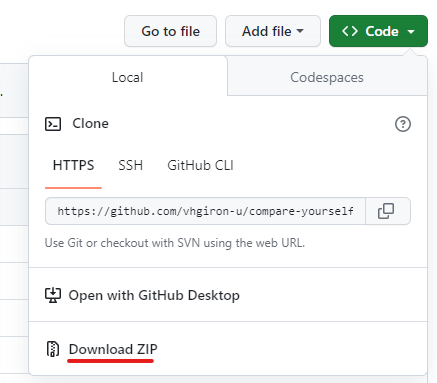
<br>

<div class="alert alert-block alert-success">
    <b>GitHub</b> is a web-based collaborative coding and a distributed version control platform based on <b>Git</b>.
</div>

<div class="alert alert-block alert-success">
    <a href="https://aws.amazon.com/s3/">Amazon S3</a> is an object storage service.
</div>


To host a static website in __Amazon S3__,  do the following:<br />
1. Create a directory in a desired location on your PC.<br /><br />
2. Right click and select __Git Bash Here__. The Git console is prompted.<br /><br />
3. Type the command `git clone https://github.com/hufedebe/compare-yourself-frontend.git` to clone the repository into your directory.

<div class="alert alert-block alert-info">
    For the purpose of this activity, the Angular demo project is already <b>built</b> in the folder <b>dist</b>, meaning that JavaScript, HTML and CSS files required the webapp are ready to be hosted in a server.
</div>

&nbsp; 4. Go to __Amazon S3__.<br /><br />
&nbsp; 5. Create a bucket with the following attributes:<br />
>Bucket name: __`1mtr15-[CODE]`__<br /><br />
>AWS Region: __`Europe (Frankfurt) eu-central-1`__<br /><br />
>In the section __Block Public Access settings for this bucket__, __Uncheck__ _Block all public access_<br /><br />
>__Check__ _I acknowledge that the current settings might result in this bucket and the objects within becoming public._<br /><br />

&nbsp; 6. Open the bucket __`1mtr15-[CODE]`__<br /><br />
&nbsp; 7. Click __Upload__ and add all the files located in the `dist` directory of the Angular project.<br /><br />
&nbsp; 8. Click __Upload__ and review the __Summary__.<br /><br />
&nbsp; 9. Click __Close__.<br /><br />
&nbsp; 10. Switch to the __Permissions__ tab.<br /><br />
&nbsp; 11. In the __Bucket policy__ section, click __Edit__<br /><br />
&nbsp; 12. Type the following __policy__:

In [ ]:
{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Sid": "PublicRead",
            "Principal": "*",
            "Effect": "Allow",
            "Action": ["s3:GetObject","s3:GetObjectVersion"],
            "Resource": ["arn:aws:s3:.../*"]  // Type bucket ARN (add /*)
        }
    ]
}

&nbsp; 13. Click __Save changes__.<br /><br />
&nbsp; 14. Switch to the __Properties__ tab.<br /><br />
&nbsp; 15. In the __Static website hosting__ section, click __Edit__.<br /><br />
&nbsp; 16. __Enable__ Static website hosting.<br /><br />
&nbsp; 17. Type __`index.html`__ as Index document and Error document.<br /><br />
&nbsp; 18. Click __Save changes__.<br /><br />
&nbsp; 19. Now the __URL__ of the static website is displayed at the bottom of the page.